In [12]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

import numpy as np
import sys
from glob import glob
import scipy.sparse as sp
from scipy import io

from IPython.display import Image

Using TensorFlow backend.


In [3]:
def load_sparse_matrix(filename):
    y = np.load(filename)
    z = sp.coo_matrix((y['data'], (y['row'], y['col'])), shape=y['shape'])
    return z

In [46]:
filenames = open('submission/images_order.csv', 'r').readline().split(',')
filenames = [f[3:] for f in filenames]
print(len(filenames))
filenames[0]

44927


'data/images/379370868_1441131810_rukVGxrhDNU.jpg'

In [6]:
vecs = load_sparse_matrix('submission/images_vec.npz')
vecs.shape

(44927, 512)

In [20]:
def vectorize(path, model):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    return pred.ravel()

In [14]:
model = VGG16(include_top=False, weights='imagenet', pooling='max')

In [24]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(vecs)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [132]:
def similar(vec):
    dist, indices = knn.kneighbors(vec.reshape(1,-1), n_neighbors=6)
    dist, indices = dist.flatten(), indices.flatten()
    return [filenames[indices[i]] for i in range(len(indices))]

# Let's do it!

In [93]:
import PIL
from matplotlib import pyplot as plt
%matplotlib inline

In [151]:
def draw(fnames, origin=None):
    if origin is not None:
        plt.imshow(PIL.Image.open(origin))
        plt.axis('off')
    plt.figure(figsize=(30,15))
    for i in range(len(fnames)):
        f = fnames[i]
        try:
            img = PIL.Image.open(f)
            plt.subplot(1,10,i+1)
            plt.axis('off')
            plt.imshow(img)
        except Exception as e:
            print(e)

['data/images/376529462_1439143142_GClK_VaWuRw.jpg', 'data/images/376529469_1439143142_XS4Wc8JAY7s.jpg', 'data/images/402584722_1455552422_xd6PshewoSY.jpg', 'data/images/387396014_1446415914_Cy3IIG9lnsc.jpg', 'data/images/402583027_1455551849_r9Jt4uwTXkM.jpg', 'data/images/336139387_1407436448_B2ytZNsmZ6w.jpg']


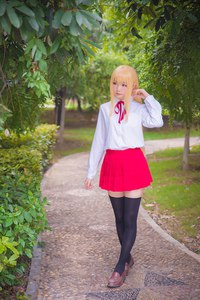

In [160]:
fname = 'data/images/376529462_1439143142_GClK_VaWuRw.jpg'

v = vectorize(fname, model)
fnames = similar(v)

print(fnames)
Image(fname)

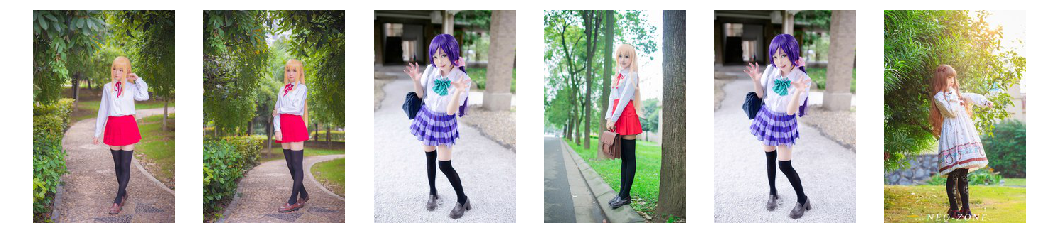

In [138]:
draw(fnames)

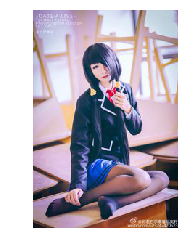

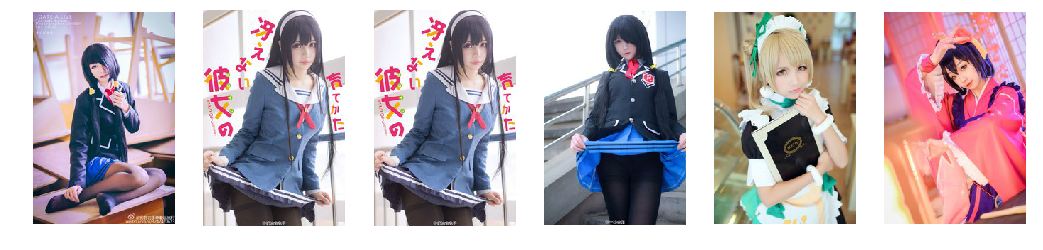

In [139]:
fname = 'data/images/376232683_1438931436_43GrZsxAZXs.jpg'
draw(similar(vectorize(fname, model)), fname)

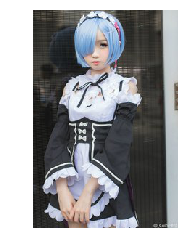

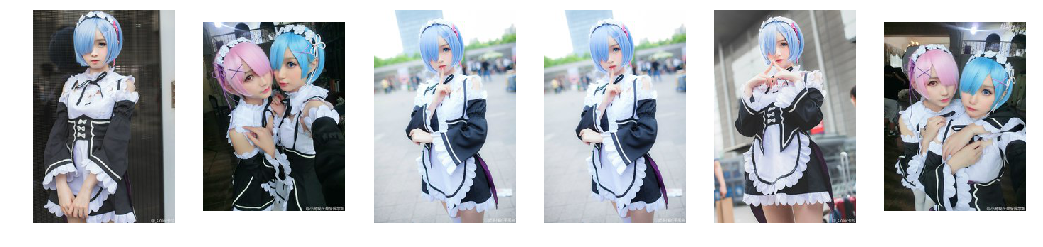

In [140]:
fname = 'data/images/421327276_1466602279_BIoj4UpmUz4.jpg'
draw(similar(vectorize(fname, model)), fname)

data/images/414547249_1462571245_TFp2hayvubA.jpg


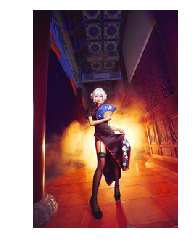

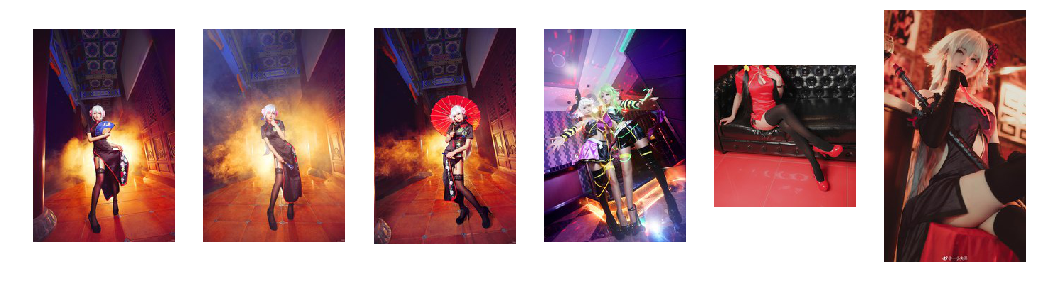

In [156]:
fname = 'data/images/414547249_1462571245_TFp2hayvubA.jpg'
print(fname)
draw(similar(vectorize(fname, model)), fname)

data/images/377940607_1440157748_VgymxckCcuk.jpg


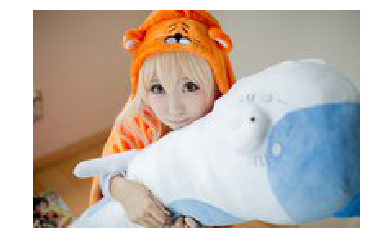

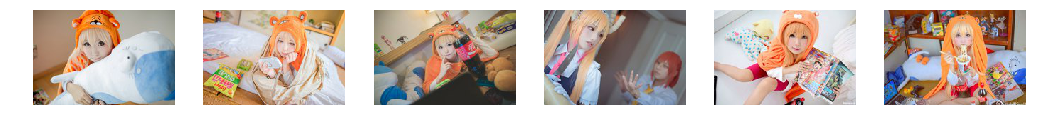

In [157]:
fname = np.random.choice(filenames)
print(fname)
draw(similar(vectorize(fname, model)), fname)

data/images/418747308_1465045049_9jKFALG_l8s.jpg


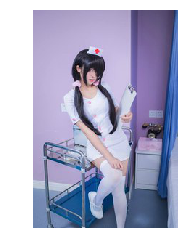

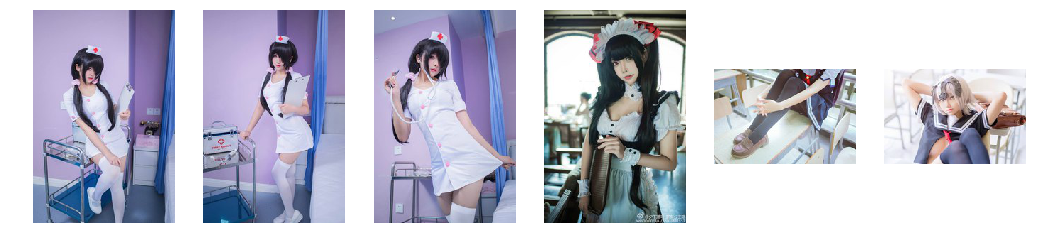

In [179]:
fname = np.random.choice(filenames)
print(fname)
draw(similar(vectorize(fname, model)), fname)